# Preliminaries and Dataframe Construction

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Included Encounters from Pickle
included_df = pd.read_pickle("encounters.pkl")
print(included_df.info())

#Import Excluded Encounters from Pickle
excluded_df = pd.read_pickle("excluded_processed.pkl")
print(excluded_df.info())

#plt.rcParams.update(plt.rcParamsDefault)

#Seaborn Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Set2')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EncounterID       3707 non-null   object  
 1   SubjectID         3707 non-null   object  
 2   Age               3707 non-null   float64 
 3   Race              3706 non-null   object  
 4   Ethnicity         3707 non-null   object  
 5   Sex               3707 non-null   object  
 6   InitialSOFA       3707 non-null   int64   
 7   StayLength        3707 non-null   float64 
 8   CCS_raw           3707 non-null   int64   
 9   CCS_age           3707 non-null   int64   
 10  CCS_Colorado      3707 non-null   int64   
 11  ECI_raw           3707 non-null   int64   
 12  LE                3707 non-null   float64 
 13  Cho_LE            3707 non-null   float64 
 14  COVID_Status      3707 non-null   int8    
 15  Discharge_Status  3707 non-null   int64   
 16  Intubation        3707 n

### Basic Counts
Basic counts for each sub-population partition in the excluded cases.

In [3]:
#EXCLUDED Patients #Age, Initial Assessment, Initial SOFA, Survival
print(excluded_df.describe(include='all'))

#Race Stats
print(pd.concat(
    [
        excluded_df.Race.value_counts(),
        excluded_df.Race.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#Sex
print(pd.concat(
    [
        excluded_df.Sex.value_counts(),
        excluded_df.Sex.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#Age
print(pd.concat(
    [
        excluded_df.Age_Group.value_counts(),
        excluded_df.Age_Group.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

#COVID Status
print(pd.concat(
    [
        excluded_df.COVID_Status.value_counts(),
        excluded_df.COVID_Status.value_counts(normalize=True)*100
    ],
    keys=['counts', '%_counts'],
    axis=1,
))

       EncounterID SubjectID         Age   Race     Ethnicity   Sex  \
count          898       898  894.000000    898           832   898   
unique         898       667         NaN      7             2     2   
top           0002     13871         NaN  White  Not Hispanic  Male   
freq             1         9         NaN    606           792   520   
mean           NaN       NaN   60.828300    NaN           NaN   NaN   
std            NaN       NaN   16.026768    NaN           NaN   NaN   
min            NaN       NaN   18.400000    NaN           NaN   NaN   
25%            NaN       NaN   51.525000    NaN           NaN   NaN   
50%            NaN       NaN   62.850000    NaN           NaN   NaN   
75%            NaN       NaN   72.100000    NaN           NaN   NaN   
max            NaN       NaN   90.000000    NaN           NaN   NaN   

        InitialSOFA  StayLength  COVID_Status     CCS_raw     CCS_age  \
count           0.0  886.000000    898.000000  888.000000  888.000000   
u

### Age-Adjusted Rates and Confidence Intervals
Following codeblock uses the simple and age-adjusted calculator functions from ```4a_dictionaries_calculators.ipnyb``` to calculcate mean, SD and 95CIs for most of the columns in the encounter dataframe. Age-adjusted survival rates are calculated using the Tiwari mod of the Fay-Feur method. The outputs of the two calculators are concated for each sub-group analysis, which is then appended together in a single CSV. A bit messy but readable.      

In [9]:
%run 4a_dictionaries_calculators.ipynb #pull functions from the age_adjusted_calculators notebook.

df_excl_overall = (pd.concat((get_raw_stats_base(excluded_df, ['Protocol']), get_age_adjusted_stats_base(excluded_df, ['Protocol'])), axis=1).reset_index())
df_excl_race = (pd.concat((get_raw_stats_base(excluded_df, ['Protocol', 'Race']), get_age_adjusted_stats_base(excluded_df, ['Protocol', 'Race'])), axis=1).reset_index())
df_excl_age = get_raw_stats_base(excluded_df, ['Protocol', 'Age_Group']).reset_index()
df_excl_sex = (pd.concat((get_raw_stats_base(excluded_df, ['Protocol', 'Sex']), get_age_adjusted_stats_base(excluded_df, ['Protocol', 'Sex'])), axis=1).reset_index())
df_excl_COVID_Status = (pd.concat((get_raw_stats_base(excluded_df, ['Protocol', 'COVID_Status']), get_age_adjusted_stats_base(excluded_df, ['Protocol', 'COVID_Status'])), axis=1).reset_index())
#df_excl_NYSOFA = (pd.concat((get_raw_stats_base(excluded_df, ['Protocol', 'NY_Score']), get_age_adjusted_stats_base(excluded_df, ['Protocol', 'NY_Score'])), axis=1).reset_index())
#df_excl_race_SOFA = (pd.concat((get_raw_stats_base(excluded_df, ['Protocol', 'Race', 'InitialSOFA']), get_age_adjusted_stats_base(excluded_df, ['Protocol', 'Race', 'InitialSOFA'])), axis=1).reset_index())


df_excl_stats = pd.concat([df_excl_overall, df_excl_sex, df_excl_age, df_excl_race, df_excl_COVID_Status], ignore_index=True)
                    
df_excl_stats = df_excl_stats.reindex(columns=(['Sex', 'Age_Group', 'Race', 'COVID_Status'] + (df_excl_stats.columns.drop(['Sex', 'Age_Group', 'Race', 'COVID_Status']).tolist())))
df_excl_stats.to_csv('excluded_stats.csv')
df_excl_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Sex                   2 non-null      object  
 1   Age_Group             8 non-null      category
 2   Race                  7 non-null      object  
 3   COVID_Status          3 non-null      float64 
 4   Protocol              21 non-null     object  
 5   Pop_N                 21 non-null     int64   
 6   Survived              21 non-null     int64   
 7   SOFA                  0 non-null      float64 
 8   StayLength            21 non-null     float64 
 9   Cho_LE                21 non-null     float64 
 10  COVID_Status_mean     21 non-null     float64 
 11  CCS_raw               21 non-null     float64 
 12  CCS_age               21 non-null     float64 
 13  CCS_Colorado          21 non-null     float64 
 14  ECI_raw               21 non-null     float64 
 15  S_rate  

<function matplotlib.pyplot.show(close=None, block=None)>

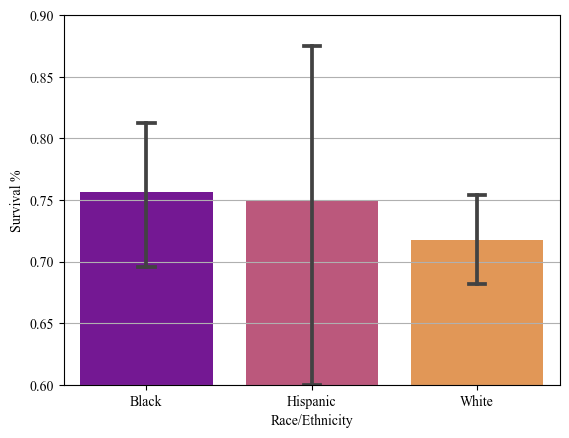

<Figure size 640x480 with 0 Axes>

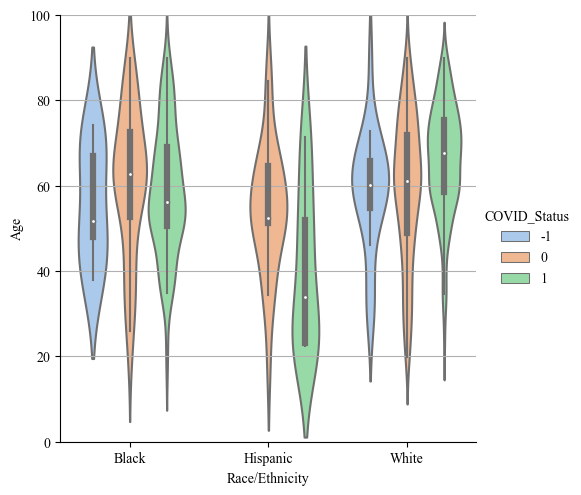

<Figure size 640x480 with 0 Axes>

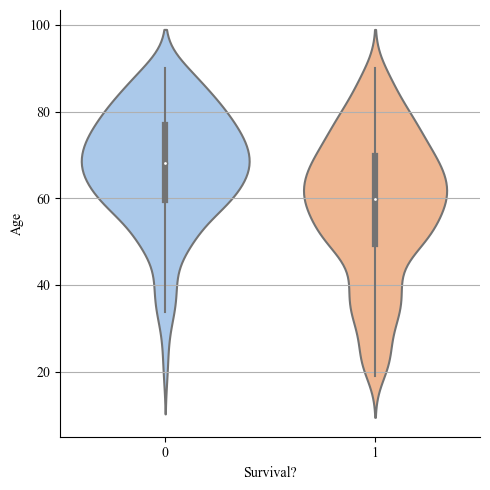

In [11]:
race_order = ['Black','Hispanic', 'White']

fig = plt.figure()
g3 = sns.barplot(y='Survived',
            x='Race',
            order = race_order, 
            data= excluded_df,
            capsize = 0.1,
            palette = 'plasma'
)
g3 = (g3.set (xlabel = "Race/Ethnicity", ylabel = "Survival %", ylim=(0.6,0.9))
)
plt.show

fig = plt.figure()
g5 = sns.catplot(data=excluded_df, 
                x="Race",
                order = race_order, 
                y="Age", 
                hue="COVID_Status",
                kind="violin", 
#                inner="stick",  
                palette="pastel",
)

g5 = (g5.set (xlabel = "Race/Ethnicity", ylabel = "Age", ylim=(0,100))
)
plt.show

plt.show
fig = plt.figure()
g6 = sns.catplot(data=excluded_df, 
                y="Age", 
                x="Survived",
                kind="violin", 
#                inner="stick", 
                split=True, 
                palette="pastel",
)

g6 = (g6.set (xlabel = "Survival", ylabel = "Age")
)
plt.show

### Initial SOFA Graphs (not used for excluded)
Because most of the errors in the excluded cases involved problems with the SOFA data in the ventilator datasheet (including no SOFA score data for initial date of intubation, and an unclear pattern of intubations and extubations) there is no data in the InitialSOFA column for all excluded encounters.

In [9]:
palette_SOFA = {c: "red" if c <=8 else "yellow" if c<12 else "blue" for c in excluded_df["InitialSOFA"].unique()}
# {'Female': 'grey', 'Male': 'r'}}

fig = plt.figure()
g5 = sns.barplot(y='Survived',
            x='InitialSOFA',
            data=excluded_df,
            capsize = 0.1,
            palette=palette_SOFA
)
g5 = (g5.set (xlabel = "InitialSOFA", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig = plt.figure()
g6 = sns.countplot(x='InitialSOFA',
            data=excluded_df,
            palette=palette_SOFA
)
g6 = (g6.set (xlabel = "InitialSOFA", ylabel = "Count")
)
plt.show

fig = plt.figure()
g7 = sns.catplot(data=excluded_df, 
                x="Race",
                order = race_order, 
                y="InitialSOFA",
                kind="violin", 
#                inner="stick", 
                split=True, 
                palette="plasma",
)

g7 = (g7.set (xlabel = "Race/Ethnicity", ylabel = "Initial SOFA Score")
)

ValueError: min() arg is an empty sequence

<Figure size 640x480 with 0 Axes>

C:\Users\jhering2\AppData\Local\Temp\ipykernel_20808\1642575997.py:20: FutureWarning: ['Ethnicity', 'Sex', 'Protocol', 'Age_Group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_race_means = df.groupby(['Race']).agg(['mean', 'sem']).to_csv('race_means.csv')


PermissionError: [Errno 13] Permission denied: 'race_means.csv'

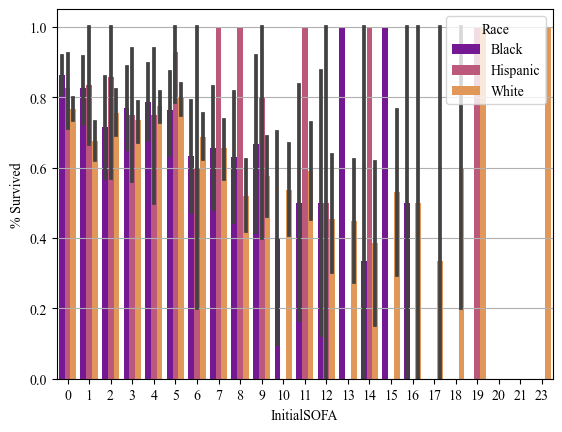

In [ ]:
race_order = ['Black','Hispanic', 'White']

fig = plt.figure()
sns.barplot(y='Survived',
            #x='InitialAssessment',
            x='InitialSOFA',
            hue='Race',
            hue_order=race_order,
            data = df,
            palette='plasma'
            #logistic=True,
            #order=order,
            #data=race_initAssessment_groupby_merge[race_initAssessment_groupby_merge.Race != 'AIAN'],
)
plt.ylabel('% Survived')
#plt.xticks(rotation=90)
plt.show

### Offcuts